In [13]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.size'] = 14

In [292]:
def make_domain_diagram(xlabel='L', ylabel='$\infty$', cape=0, q=False):
    """Quick plotting code for a domain diagram
    """
    
    # Make figure
    fig, ax = plt.subplots(1, 1, figsize=(13, 5))
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    
    # Default labels
    yticks = [0, 1]
    yticklabels = [0, xlabel]
    
    # Add coastline ticks
    for tick in np.arange(0, 1, 0.01):
        ax.plot([tick, tick+0.01], [0, -0.02], 'k-', clip_on=False)
    if (cape > 0) and (cape < 1):
        yticks.insert(1, cape)
        yticklabels.insert(1, 'M')
    for tick in np.arange(0, cape-0.02, 0.03):
        ax.plot([-0.008, 0], [tick, tick+0.02], 'k-', clip_on=False)
    
    # Add upwelling region
    if q:
        yticks.insert(1, 0.15)
        yticklabels.insert(1, 'E')
        ax.plot([0, 1], [0.15, 0.15], 'k--')
            
    # Add labels
    ax.set_xlabel('Y')
    ax.set_ylabel('X')
    ax.xaxis.set_ticks([0])
    ax.yaxis.set_ticks(yticks)
    ax.yaxis.set_ticklabels(yticklabels)
    ax.tick_params(direction='out', pad=8)
    ax.arrow(1.01, 0, 0.01, 0, clip_on=False, head_width=0.02, head_length=0.01, fc='k')
    ax.text(1.035, -0.01, ylabel)
    
    return fig, ax

In [68]:
# Define constants
f = 1e-4
g = 9.81

### Arrested topographic wave

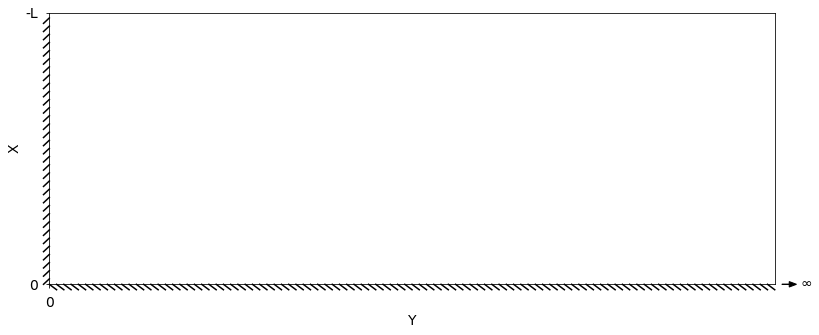

In [295]:
fig, ax = make_domain_diagram(xlabel='-L', cape=1)

$\require{cancel}$
Start with steady shallow water equations

$$
\begin{align}
- fv & = -g\frac{\partial\eta}{\partial x} \tag{1a} \\
fu & = -g\frac{\partial\eta}{\partial y} + \frac{\tau_y}{h} - \frac{\mu v}{h} \tag{1b} \\
0 & = \frac{\partial hu}{\partial x} + \frac{\partial hv}{\partial y} \tag{1c}
\end{align}
$$

Vorticity equation

$$fh\left(\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y}\right) = -\frac{\partial h}{\partial x}\left[\frac{\tau_y}{h} + \frac{\mu g}{f}\left(\frac{1}{h_x}\frac{\partial^2\eta}{\partial x^2} - \frac{1}{h}\frac{\partial\eta}{\partial x}\right)\right] \tag{2}$$

Sub continuity equation

$$fu = \frac{\tau_y}{h} + \frac{\mu g}{f}\left(\frac{1}{h_x}\frac{\partial^2\eta}{\partial x^2} - \frac{1}{h}\frac{\partial\eta}{\partial x}\right) \tag{3}$$

Sub (1b) to produce ATW equation

$$\boxed{\hspace{0.5cm} \frac{\partial^2\eta}{\partial x^2} + \frac{f}{\mu}\frac{\partial h}{\partial x}\frac{\partial\eta}{\partial y} = 0 \hspace{0.5cm}} \tag{4}$$

Linearize by letting $\frac{\partial h}{\partial x} = -s$

$$\frac{\partial^2\eta}{\partial x^2} - \frac{fs}{\mu}\frac{\partial\eta}{\partial y} = 0 \tag{5}$$

#### Case 1: Windstress boundary condition

$$
\begin{align}
\frac{\partial\eta}{\partial x}(0, y) & = \frac{f\tau_y}{\mu g} & \text{(windstress at coast)} \tag{6a}\\
\eta(-L, y) = \eta(x, 0) & = 0 & \text{(shelf and upstream)} \tag{6b}
\end{align}
$$

We use Duhamel's Principle to relate the full boundary problem $\eta$ to a simpler boundary problem $\phi$

$$\eta(x, y) = \int_0^y\phi(x, y - \xi)f'(\xi) + f(0)\phi(x, y) \tag{7}$$

Consider steady and transient solutions

$$\eta(x, y) = \bar{\eta}(x) + \hat{\eta}(x, y) \tag{7}$$

Where $\bar{\eta}(x)$ is the linear height between $x=0$ and $x=L$ at large $y$ (from Farlow 1982, p. 46)

$$\bar{\eta}(x) = \frac{f\tau_y}{\mu g}\left(x - L\right) \tag{8}$$

and the transient solution is the solution to (5) with homogeneous boundary conditions

$$\hat{\eta}(x, y) = \sum_{n=1}^{\infty}A_n\exp\left({\frac{\mu}{fs}\frac{n\pi y}{L}}\right)\sin\left(\frac{n\pi x}{L}\right) \tag{9}$$

The transient initial condition cancels the steady ($y$-independent) condition

$$\hat{\eta}(x, 0) = -\frac{f\tau_y}{\mu g}\left(x - L\right) \tag{10}$$

The coefficients $A_n$ are thus given by

$$
\begin{align}
A_n & = -\frac{2f\tau_y}{\mu gL}\left[\int_0^Lx\sin\left(\frac{n\pi x}{L}\right)dx - L\int_0^L\sin\left(\frac{n\pi x}{L}\right)dx\right] \\
& = -\frac{2f\tau_y}{n\pi\mu g}\left[\frac{L}{n\pi}\sin\left(\frac{n\pi x}{L}\right) - \left(x - L\right)\cos\left(\frac{n\pi x}{L}\right)\right]_0^L \\
& = \frac{2f\tau_yL}{\pi\mu g}\frac{1}{n} \tag{11}
\end{align}
$$

The full solution is thus

$$\eta(x, y) = \frac{f\tau_y}{\mu g}\left[\left(x - L\right) + \frac{2L}{\pi}\sum_{n=1}^{\infty}\frac{1}{n}\exp\left({\frac{\mu}{fs}\frac{n\pi y}{L}}\right)\sin\left(\frac{n\pi x}{L}\right)\right] \tag{12}$$

Actually, since the windstress boundary represents a flux into the system, we need a more sophisticated solution. The solution given by Carslaw and Jaeger (p. 112) is as follows.

$$\eta(x, y) = -\frac{\tau_yy}{sgL} + \frac{f\tau_yL}{\mu g}\left\{\frac{3x^2 - L^2}{6L^2} -\frac{2}{\pi^2}\sum_{n=1}^\infty\frac{(-1)^n}{n^2}\exp\left(\frac{-\mu n^2\pi^2y}{fsL^2}\right)\cos\left(\frac{n\pi x}{L}\right)\right\} \tag{13} $$

In [418]:
# ATW Case 1: Wind forcing at coast
mu = 1
tau_y = 1
s = 1
L = 1e3
N = 1000

xi = np.arange(0, 3, .1)
yi = np.arange(-L, 0, 10)
x, y = np.meshgrid(xi, yi)

eta_hat = 0
for n in range(1, N):
    eta_hat = eta_hat + (-1)**n / n**2 * np.exp(mu * n**2 * np.pi**2 * y / (f * s * L**2)) * np.cos(n * np.pi * x / L)

eta = tau_y / g * (y / (s * L) + f * L / mu * (3 * x**2 - L**2 / (6 * L**2) - 2 / np.pi**2 * eta_hat))

In [397]:
# Behavior far from y=0
L = 10
xi = np.arange(0, L, 1)
yi = np.arange(-L, 0, 1)
x, y = np.meshgrid(xi, yi)

eta = tau_y / g * (y / (s * L) + f * L / mu * 3 * x**2 - L**2 / (6 * L**2))

<a list of 7 text.Text objects>

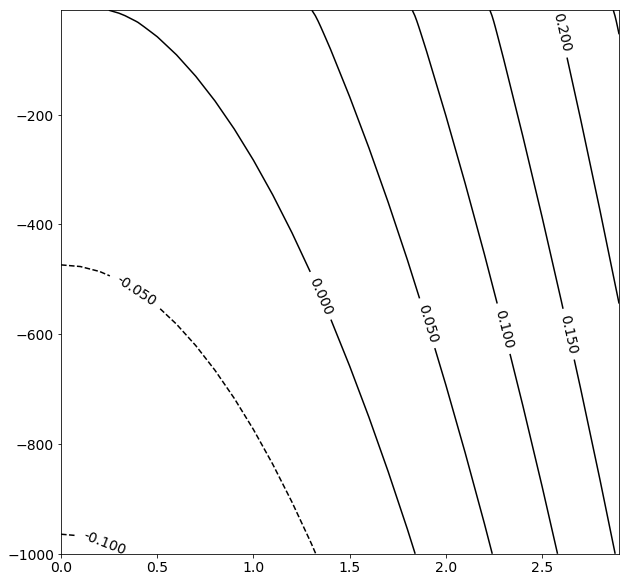

In [419]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

c = ax.contour(xi, yi, eta, colors='k')
ax.clabel(c)

### Linear time dependence model

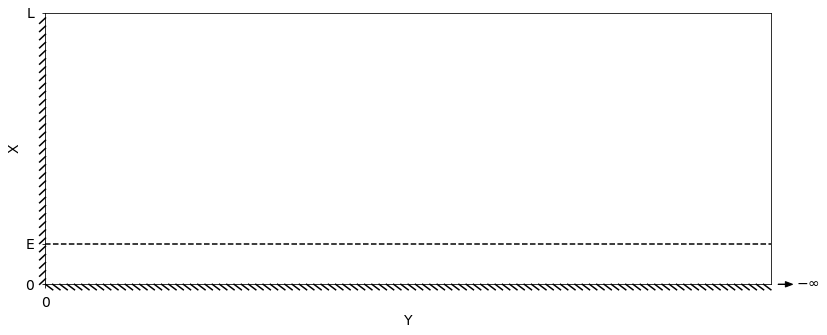

In [296]:
fig, ax = make_domain_diagram(xlabel='L', ylabel='$-\infty$', cape=1, q=True)

From Susan's paper, the time dependent SWE's with $\eta = \eta_1ft + \eta_0$ give

$$R^2\nabla^2\eta_1 - \eta_1 = \frac{q}{f} \tag{13}$$

The solution is the sum of homogeneous and particular solutions

$$\eta_1 = \phi + \bar{\eta}_1(x) \tag{14} $$

And the homogenous equation is a Helmholz equation

$$\nabla^2\phi - \frac{1}{R^2}\phi = 0 \tag{15}$$

This time orient the coastline in the $y$ direction with a wall boundary at the north end ($y=0$).

Boundary conditions are

$$
\begin{align}
\phi(x, 0) & = \bar{\eta}_1(0) - \bar{\eta}_1(x) & \text{($\phi$ constant along walls)} \tag{16a} \\
\frac{\partial\phi}{\partial y}(x, 0) & = \phi(0, y) = 0 & \text{($\phi$ constant along walls)} \tag{16b} \\
\phi(L, y) & = f(y) & \text{($\phi$ slope at ocean boundary)} \tag{16c} \\
\end{align}
$$

In [305]:
# Physical parameters
rho_0 = 1.2e3 # Background density           [kg/m3]
drho = 10     # Interface density difference [kg/m3]
tau = 0.1     # Windstress                   [N/m2]
H_u = 20      # Depth of upper layer         [m]
H_s = 50      # Depth over shelf             [m]
H_d = 5e2     # Depth beyond shelfbreak      [m]

# Domain parameters
L = 1e4       # Shelf width                  [m]
E = 1e3       # Upwelling lengthscale        [m]

# Rossby radius [m]
R = np.sqrt(g * drho/rho_0 * H_u * (H_s - H_u) / H_s) / f

# Ekman pumping [m/s]
q_0 = tau / (rho_0 * E * f)

$\bar{\eta}_1(x)$ is from Allen 1996 *JPO*.

In [306]:
def calc_eta_bar(x, H_s, H_d, S, E, R, q_0, f):
    """
    """
    
    # Depth ratio
    alpha = np.sqrt(H_s / H_d)
    
    # Primary cosh and sinh terms
    top = alpha * np.sinh((S - E) / R) + np.cosh((S - E) / R)
    bot = alpha * np.sinh(S / R) + np.cosh(S / R)
    
    # Solution
    eta_bar = -q_0 / f * np.sinh(E / R) / bot * (alpha * np.cosh((S - x) / R) + np.sinh((S - x) / R))
    eta_bar[x <= E] = q_0 / f * (top / bot * np.cosh(x[x <= E] / R) - 1)
    
    return eta_bar

#### Relaxation solution

The discrete residual of equation (13) is equal to the 5 point stencil

$$r_{i, j}^{(n)} = -\frac{R^2}{d^2}\left(\phi_{i+1, j}^{(n)} + \phi_{i-1, j}^{(n)} + \phi_{i, j+1}^{(n)} + \phi_{i, j-1}^{(n)}\right) + \left(\frac{4R^2}{d^2} + 1\right)\phi_{i, j}^{(n)} \tag{17}$$

We apply the SOR relaxation to $\eta_{i, j}$

$$\phi_{i, j}^{(n+1)} = \phi_{i, j}^{(n)} - \mu\frac{1}{\frac{4R^2}{d^2} + 1}r_{i, j}^{(n)} \tag{18}$$

with convergence criteria

$$d^2\frac{\left|\left|r_{i, j}^{(n)}\right|\right|_\infty}{\left|\left|\phi_{i, j}^{(n)}\right|\right|_\infty} < TOL \hspace{0.5cm} \text{where} \hspace{0.5cm} \left|\left|r_{i, j}^{(n)}\right|\right|_\infty = \max_{i, j}\left|r_{i, j}^{(n)}\right| \tag{19}$$

In [366]:
# Find phi by relaxation

# Parameters
M = 100         # matrix size
N = 1000        # max iterations
d = int(L / M)  # grid space
mu = 1.5        # SOR convergence parameter
TOL = 1e-4      # Convergence tolerance
k = 5e-4

# Indices
x = np.arange(M) / (M - 1) * L
y = (np.arange(M) / (M - 1) - 1) * L

# Allocate arrays
phi = np.zeros((M, M))
r = np.zeros((M, M))

# Calculate eta_bar
eta_bar = calc_eta_bar(x, H_s, H_d, S, E, R, q_0, f)

# Boundaries
phi[-1, :] = eta_bar[0] - eta_bar
phi[:, -1] = (eta_bar[0] - eta_bar[-1]) * np.exp(k * y)

# Loop
for n in range(N):
    for i in range(1, M-1):
        for j in range(1, M-1):
            res[i, j] = -R**2 / d**2 * (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1]) + (4 * R**2 / d**2 + 1) * phi[i, j]
            phi[i, j] = phi[i, j] - mu / (4 * R**2 / d**2 + 1) * res[i, j]
    if d**2 * np.max(abs(res)) / np.max(abs(phi)) < TOL:
        break

Plot solution

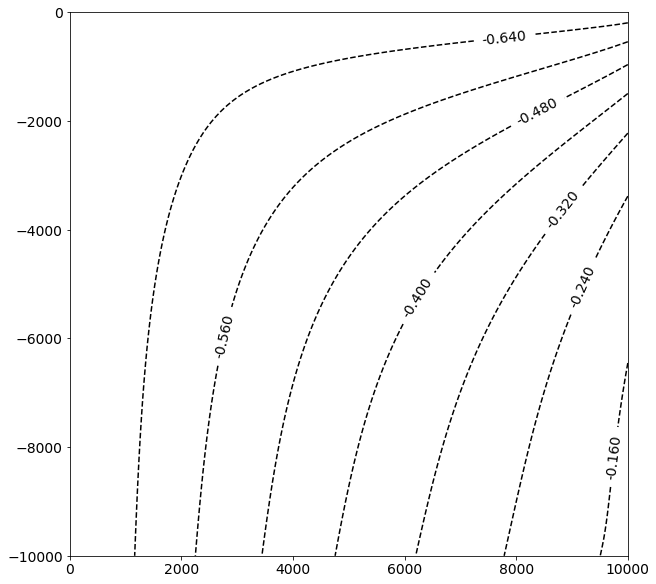

In [369]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

c = ax.contour(x, y, phi + eta_bar, colors='k')
ax.clabel(c)

plt.show()

#### Laplace transform

Take the Laplace transform of (13) from $y \to \xi$

$$\mathcal{L}\left\{\frac{\partial^2\phi}{\partial x^2}\right\} + \mathcal{L}\left\{\frac{\partial^2\phi}{\partial y^2}\right\} - \frac{1}{R^2}\mathcal{L}\left\{\phi\right\} = 0 \tag{15}$$

$$\frac{\partial^2\hat{\phi}}{\partial x^2}(x, \xi) + \xi^2\hat{\phi}(x, \xi) - \xi\underbrace{\left[\bar{\eta}_1(0) - \bar{\eta}_1(x)\right]}_{\text{(14a)}} - \underbrace{\cancel{\frac{\partial\phi}{\partial y}(x, 0)}}_{\text{(14b)}} - \frac{1}{R^2}\hat{\phi}(x, \xi) = 0 \tag{16}$$

$$\frac{\partial^2\hat{\phi}}{\partial x^2}(x, \xi) + \mu^2\hat{\phi}(x, \xi) = g(x) \tag{17}$$

where

$$
\begin{align}
\mu^2 & = \xi^2 - \frac{1}{R^2}, \hspace{0.5cm} \xi > \frac{1}{R} \tag{18a} \\
g(x) & = \xi\left[\bar{\eta}_1(0) - \bar{\eta}_1(x)\right] \tag{18b}
\end{align}
$$

$$\hat{\phi}(x, \xi) = \underbrace{\cancel{c_1}}_{\text{14b}}\cos(\mu x) + \underbrace{\frac{F(\xi)}{\sin(\mu S)}}_{\text{14c}}\sin(\mu x) + \underbrace{\frac{1}{\mu^2}g(x)}_{\hat{\phi}_P} \tag{19}$$

This equation is solvable, but finding inverse Laplace transforms for sines and cosines is difficult

#### Fourier transform solution

Take the Fourier transform of (13) from $y \to \xi$

$$\mathcal{F}\left\{\frac{\partial^2\phi}{\partial x^2}\right\} + \mathcal{F}\left\{\frac{\partial^2\phi}{\partial y^2}\right\} - \frac{1}{R^2}\mathcal{F}\left\{\phi\right\} = 0 \tag{20}$$

$$\frac{\partial^2\hat{\phi}}{\partial x^2} - \left(\xi^2 + \frac{1}{R^2}\right)\hat{\phi} = 0 \tag{21}$$

which has solution

$$\hat{\phi} = c_1\cosh\left[\left(\xi^2 + \frac{1}{R^2}\right)^{\frac{1}{2}}x\right] + c_2\sinh\left[\left(\xi^2 + \frac{1}{R^2}\right)^{\frac{1}{2}}x\right] \tag{22}$$